In [10]:
import pandas as pd
import numpy as np
import scanpy as sc
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

import os 
import sys
import gc

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.sans-serif'] = 'Arial'
sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
sns.set_style('white', {'axes.grid' : False})

sys.path.append('/home/lee/project/scanpy_func/')

import scanpy_func as sf

def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)

In [11]:
adata = sc.read_h5ad("./herv_bulk_celltype.h5ad")
adata

AnnData object with n_obs × n_vars = 8056 × 41460
    obs: 'age', 'sex', 'indiv_ID_celltype'
    var: 'type'
    uns: 'log1p'

In [12]:
adata.obs['celltype'] = adata.obs['indiv_ID_celltype'].apply(lambda x : x.split("_")[-1])

In [13]:
adata = adata[adata.obs['celltype'].isin([ 'CD4-T', 'CD8-T', 'NK', 'Bcells','Myeloid'])]

In [14]:
import scipy.sparse as sps
tmp = sps.csr_matrix(adata.X)
tmp

<4905x41460 sparse matrix of type '<class 'numpy.float32'>'
	with 9277511 stored elements in Compressed Sparse Row format>

In [51]:
adata

AnnData object with n_obs × n_vars = 4905 × 41460
    obs: 'age', 'sex', 'indiv_ID_celltype', 'celltype'
    var: 'type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [52]:
hdeg = sf.deg(adata, groupby='celltype', use_raw=False)
hdeg

ranking genes


/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:12)


,Bcells_names,Bcells_logfoldchanges,Bcells_pvals_adj,CD4-T_names,CD4-T_logfoldchanges,CD4-T_pvals_adj,CD8-T_names,CD8-T_logfoldchanges,CD8-T_pvals_adj,Myeloid_names,Myeloid_logfoldchanges,Myeloid_pvals_adj,NK_names,NK_logfoldchanges,NK_pvals_adj
0,MLT1H2_dup140-chr2,5.711118,0.000000e+00,LTR33_dup233-chr20,5.558444,0.000000e+00,MLT1G3-chr12,2.932717,0.000000e+00,LTR45B_dup4-chr11,6.361022,0.000000e+00,LTR7_dup7-chr12,5.879521,0.000000e+00
1,MLT1N2_dup9-chr11,5.157213,0.000000e+00,LTR16C_dup325-chr3,4.683991,0.000000e+00,LTR37-int_dup6-chr12,2.625324,2.626549e-250,MLT1G1_dup122-chr12,3.578492,1.199206e-268,PRIMA4-int_dup6-chr14,4.536714,0.000000e+00
2,MLT1D_dup485-chr6,3.967775,0.000000e+00,MER61A_dup46-chr4,4.549671,0.000000e+00,MSTC_dup6-chr12,2.719316,2.468509e-243,LTR7B_dup21-chr4,1.520138,8.808022e-225,LTR37B_dup34-chr18,6.690460,0.000000e+00
3,MER4-int_dup28-chr17,6.064415,0.000000e+00,MER74A_dup13-chr21,3.023803,0.000000e+00,THE1B_dup848-chr6,2.704037,1.620348e-235,LTR40c_dup23-chr8,3.701695,4.515670e-208,MER4E1_dup18-chr15,3.577645,0.000000e+00
4,HERV15-int_dup3-chr16,7.442446,0.000000e+00,MER77B_dup28-chr10,3.288500,0.000000e+00,HERVIP10FH-int_dup1-chr12,2.917294,1.620348e-235,LTR84a_dup12-chr10,6.547785,2.928947e-203,MLT1A0_dup280-chr14,3.276280,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41455,MLT1C_dup335-chr17,-3.464806,2.925327e-254,MLT1A1_dup120-chr11,-0.710250,1.469008e-106,MLT1K_dup375-chr20,-5.424904,3.009522e-58,MLT1A0_dup398-chr17,-3.483864,1.755642e-289,THE1C_dup339-chr3,-2.078522,2.852239e-112
41456,MLT1A0_dup113-chr10,-3.198774,3.481047e-272,MER65-int_dup75-chr4,-0.747975,8.525010e-110,LTR61_dup3-chr4,-5.472551,2.548356e-59,MER21B_dup70-chr10,-2.572924,0.000000e+00,MER61-int_dup83-chr4,-2.010575,4.356869e-114
41457,MLT1A0_dup280-chr14,-6.120949,0.000000e+00,MLT1A0_dup524-chr14,-2.963016,1.145382e-228,MLT1H2_dup140-chr2,-4.064029,6.964494e-66,ERV3-16A3_I-int_dup243-chr2,-2.048559,0.000000e+00,Harlequin-int_dup62-chr1,-5.599065,5.046525e-138
41458,Harlequin-int-chr17,-4.409943,0.000000e+00,MSTC_dup122-chr8,-1.186148,2.167059e-234,Harlequin-int_dup62-chr1,-5.248126,1.261502e-122,ERV3-16A3_I-int_dup246-chr2,-2.503157,0.000000e+00,MLT1G1_dup122-chr12,-3.162715,3.352208e-144


In [53]:
sc.pp.filter_genes(adata,min_cells = 0)
adata.var['herv'] = adata.var.index
herv_dict = dict(zip(adata.var['herv'],adata.var['n_cells']))
hdeg['CD4-T_cells'] = hdeg['CD4-T_names'].apply(lambda x :herv_dict[x] )
hdeg['CD8-T_cells'] = hdeg['CD8-T_names'].apply(lambda x :herv_dict[x] )
hdeg['Bcells_cells'] = hdeg['Bcells_names'].apply(lambda x :herv_dict[x] )
hdeg['NK_cells'] = hdeg['NK_names'].apply(lambda x :herv_dict[x] )
hdeg['Myeloid_cells'] = hdeg['Myeloid_names'].apply(lambda x :herv_dict[x] )

In [54]:
CD4_df = hdeg[['CD4-T_names','CD4-T_pvals_adj','CD4-T_logfoldchanges','CD4-T_cells']]
CD8_df = hdeg[['CD8-T_names','CD8-T_pvals_adj','CD8-T_logfoldchanges','CD8-T_cells']]
Bcells_df = hdeg[['Bcells_names','Bcells_pvals_adj','Bcells_logfoldchanges','Bcells_cells']]
NK_df = hdeg[['NK_names','NK_pvals_adj','NK_logfoldchanges','NK_cells']]
Myeloid_df = hdeg[['Myeloid_names','Myeloid_pvals_adj','Myeloid_logfoldchanges','Myeloid_cells']]
CD4_df.name = "CD4-T"
CD8_df.name = "CD8-T"
NK_df.name = "NK"
Bcells_df.name = "Bcells"
Myeloid_df.name = "Myeloid"

In [55]:
for celltype in [CD4_df,CD8_df,Bcells_df,NK_df,Myeloid_df]:
    celltype['celltype'] = celltype.name
    celltype.columns = ["herv","pvalue","logfoldchange",'n_cells',"celltype"]
df_all = pd.concat([CD4_df,CD8_df,Bcells_df,NK_df,Myeloid_df],axis = 0,ignore_index=True)

/tmp/ipykernel_1518645/907194830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype['celltype'] = celltype.name
/tmp/ipykernel_1518645/907194830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype['celltype'] = celltype.name
/tmp/ipykernel_1518645/907194830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [56]:
df_all = df_all[(df_all['pvalue']<1e-5) & (df_all['logfoldchange']>1)&(df_all['n_cells']>500)]
df_all

,herv,pvalue,logfoldchange,n_cells,celltype
0,LTR33_dup233-chr20,0.000000e+00,5.558444,1715,CD4-T
1,LTR16C_dup325-chr3,0.000000e+00,4.683991,1429,CD4-T
2,MER61A_dup46-chr4,0.000000e+00,4.549671,1329,CD4-T
3,MER74A_dup13-chr21,0.000000e+00,3.023803,3660,CD4-T
4,MER77B_dup28-chr10,0.000000e+00,3.288500,2309,CD4-T
...,...,...,...,...,...
166176,MER57C2_dup3-chr10,3.048251e-07,2.211886,590,Myeloid
166186,MER66D_dup7-chr16,7.073587e-07,1.368359,946,Myeloid
166190,LTR79_dup17-chrX,9.449758e-07,1.829095,580,Myeloid
166204,Harlequin-int-chr5,3.076456e-06,1.408874,654,Myeloid


In [26]:
df_all.to_csv("./gse_herv_celltype.csv",index=None)

In [61]:
adata.obs['celltype'] = pd.Categorical(adata.obs['celltype'], categories=['CD4-T', 'CD8-T','NK','Bcells','Myeloid'], ordered=True) 
adata.obs['celltype'].unique()

['CD8-T', 'CD4-T', 'NK', 'Bcells', 'Myeloid']
Categories (5, object): ['CD4-T' < 'CD8-T' < 'NK' < 'Bcells' < 'Myeloid']

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


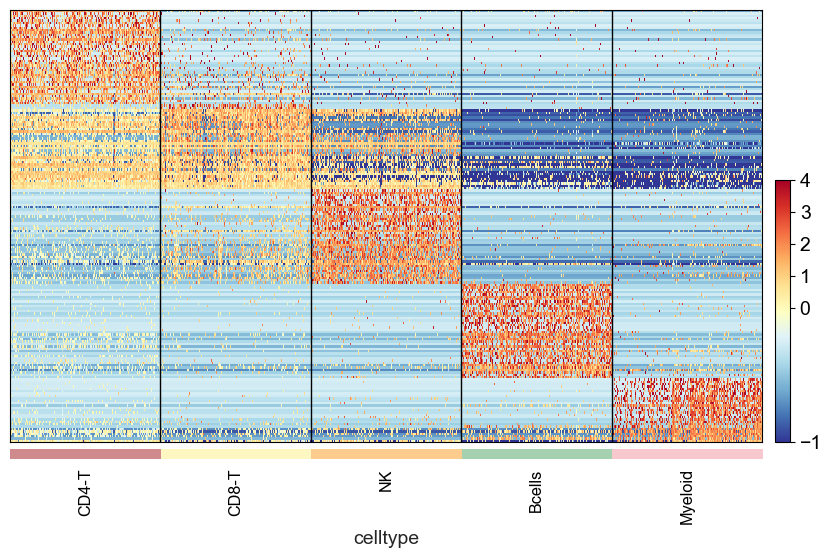

In [57]:
sf.marker_heatmap(adata, hdeg, groupby='celltype', n=40, use_raw=False, vmin=-1, vmax=4,  vcenter=-0.1, swap_axes=True, figsize=(10, 6),
                  cmap='RdYlBu_r', order=[ 'CD4-T', 'CD8-T', 'NK', 'Bcells','Myeloid'], save='herv_celltype_markers.pdf')

In [47]:
adata.write_h5ad("herv_bulk_celltype.h5ad")

## leiden

extracting highly variable genes


/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
2045


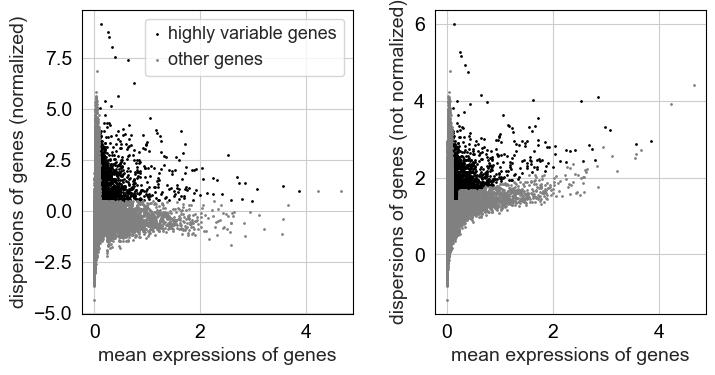

In [74]:
min_disp=0.5
min_mean=0.1
max_mean=4

sc.pp.highly_variable_genes(adata, flavor="seurat", min_disp=min_disp, min_mean=min_mean, max_mean=max_mean)
print(adata.var['highly_variable'].sum())
sc.pl.highly_variable_genes(adata)

In [75]:
adata.raw = adata

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


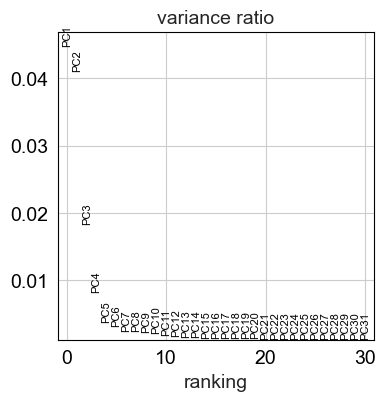

In [76]:
adata = adata[:, adata.var['highly_variable']]
sc.pp.scale(adata, max_value=10)

sc.pp.pca(adata)
sc.pl.pca_variance_ratio(adata)

In [18]:
n_neighbors=40
n_pcs=5
res=0.5

sc.pp.neighbors(adata, n_neighbors=n_neighbors)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50


2025-06-17 22:16:39.487741: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-17 22:16:39.824398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750169799.903200 1518645 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750169799.956349 1518645 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-17 22:16:40.218864: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


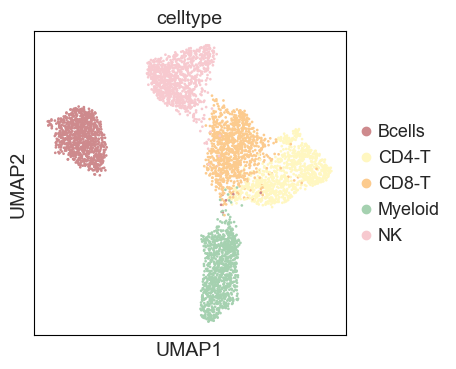

In [19]:
colors = ["#CE8A8D", "#FFF7C1", "#FCCB8E", "#A5D1B0", "#F7C9CF", ]
sc.pl.umap(adata, color=['celltype'], vmax='p99', palette=colors, save='herv_cluster.pdf', size=15)

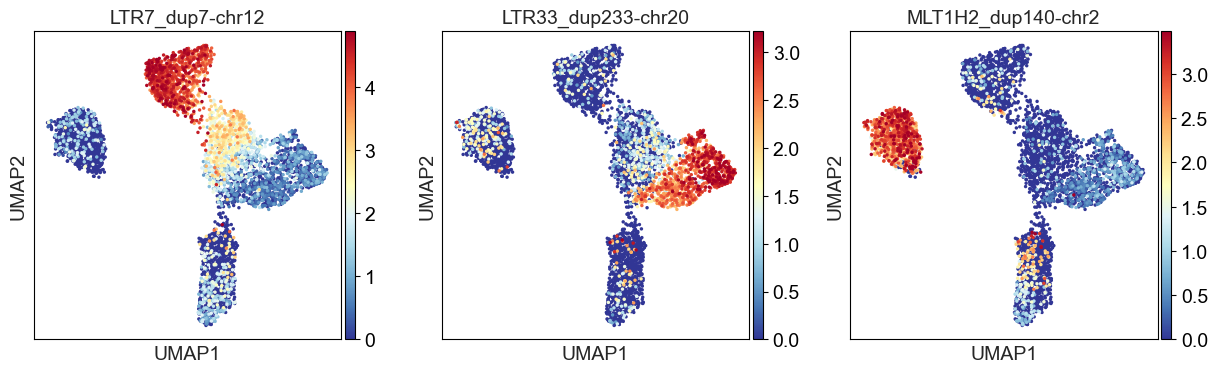

In [20]:
genes = ['LTR7_dup7-chr12', 'LTR33_dup233-chr20', 'MLT1H2_dup140-chr2']
sc.pl.umap(adata, color=genes, vmax='p99', cmap='RdYlBu_r', save='herv_markers.pdf')

<Axes: xlabel='r2', ylabel='Count'>

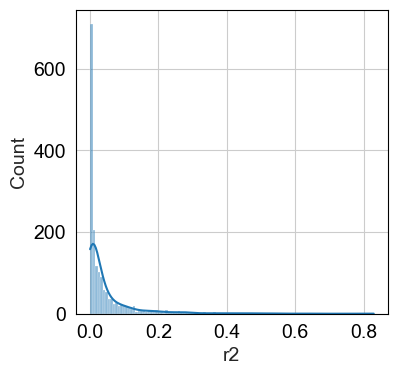

In [77]:
corr = pd.read_csv('herv_rna_corr.csv', index_col=0)
hvg_corr = corr.loc[corr.index.isin(adata.var_names), :]
sns.histplot(hvg_corr['r2'], kde=True)

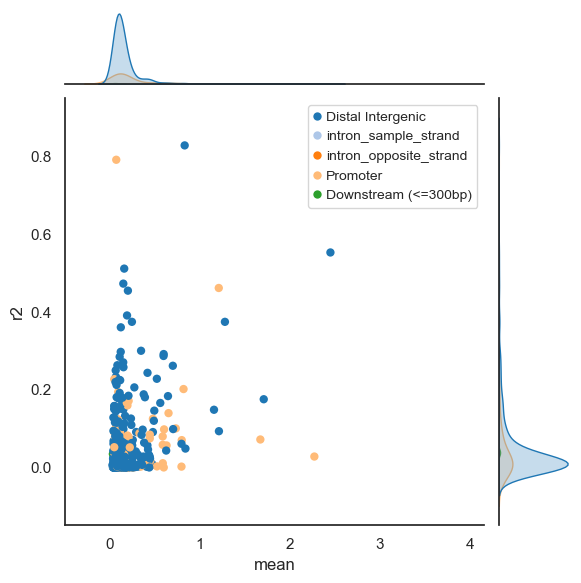

In [70]:
sns.set_theme(style="white", )
sns.jointplot(data=hvg_corr, x='mean', y='r2', hue='anno', linewidth=0, palette='tab20',
               hue_order = ['Distal Intergenic', 'intron_sample_strand', 'intron_opposite_strand', 'Promoter', 'Downstream (<=300bp)'],)

# sns.scatterplot(data=df.loc[df['anno']=='intron_opposite_strand'], x='mean', y='r')

# sns.scatterplot(data=df.loc[df['anno']=='intron_sample_strand'], x='mean', y='r')
plt.legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)
plt.savefig('hvg_corr.pdf')

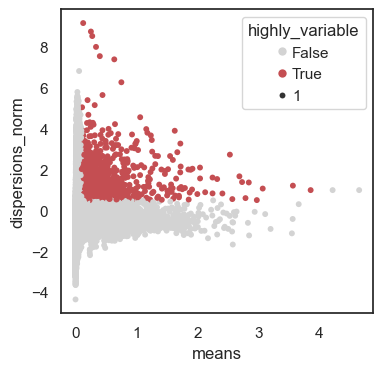

In [75]:
tmp = adata.raw.to_adata()
sns.scatterplot(data=tmp.var, x='means', y='dispersions_norm', hue='highly_variable', size=1, linewidth=0, palette=['lightgrey', "r"], rasterized=True, )
plt.savefig('hvg_dispersion.pdf')

In [81]:
tmp_adata = sc.read_h5ad('herv.h5ad')
adata.var['anno'] = tmp_adata.var['anno']

In [83]:
adata.var['anno'].value_counts()

anno
Distal Intergenic       783
intron_sample_lian      608
intron_opposite_lian    486
Promoter                166
Downstream (<=300bp)      2
Name: count, dtype: int64

In [35]:
adata.obs

,age,sex,indiv_ID_celltype,celltype
344_345_CD8-T,61,male,344_345_CD8-T,CD8-T
334_335_CD4-T,60,female,334_335_CD4-T,CD4-T
636_637_NK,75,male,636_637_NK,NK
459_460_NK,87,female,459_460_NK,NK
688_689_Bcells,66,male,688_689_Bcells,Bcells
...,...,...,...,...
355_356_Myeloid,27,female,355_356_Myeloid,Myeloid
30_30_Myeloid,37,male,30_30_Myeloid,Myeloid
141_141_Myeloid,36,female,141_141_Myeloid,Myeloid
283_284_Myeloid,47,male,283_284_Myeloid,Myeloid


## gene

In [38]:
rna = sc.read_h5ad('gene_bulk_celltype.h5ad')
rna.obs['celltype'] = rna.obs['indiv_ID_celltype'].apply(lambda x : x.split("_")[-1])
rna = rna[rna.obs['celltype'].isin([ 'CD4-T', 'CD8-T', 'NK', 'Bcells','Myeloid']),:]

extracting highly variable genes
    finished (0:00:01)


/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:553: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
2282


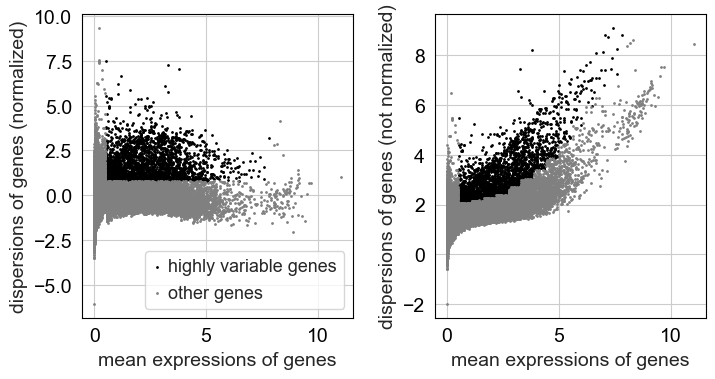

In [39]:
min_disp=0.8
min_mean=0.5
max_mean=8

sc.pp.highly_variable_genes(rna, flavor="seurat", min_disp=min_disp, min_mean=min_mean, max_mean=max_mean)
print(rna.var['highly_variable'].sum())
sc.pl.highly_variable_genes(rna)

In [40]:
rna.raw = rna
# rna = rna.raw.to_adata()

/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


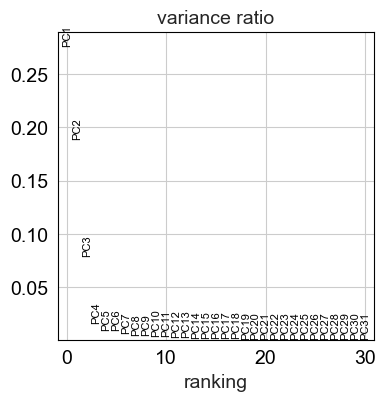

In [41]:
rna = rna[:, rna.var['highly_variable']]
sc.pp.scale(rna, max_value=10)

sc.pp.pca(rna)
sc.pl.pca_variance_ratio(rna)

In [42]:
rna.obs_names = [x.replace('@', '_') for x in rna.obs_names]
rna.obs = adata.obs

In [43]:
rna = rna.raw.to_adata()
rna.X = sps.csr_matrix(rna.X)

In [44]:
rna_mean = sf.adata_group(rna, groupby='celltype', method='mean')
rna_mean

AnnData object with n_obs × n_vars = 5 × 25049
    obs: 'celltype'

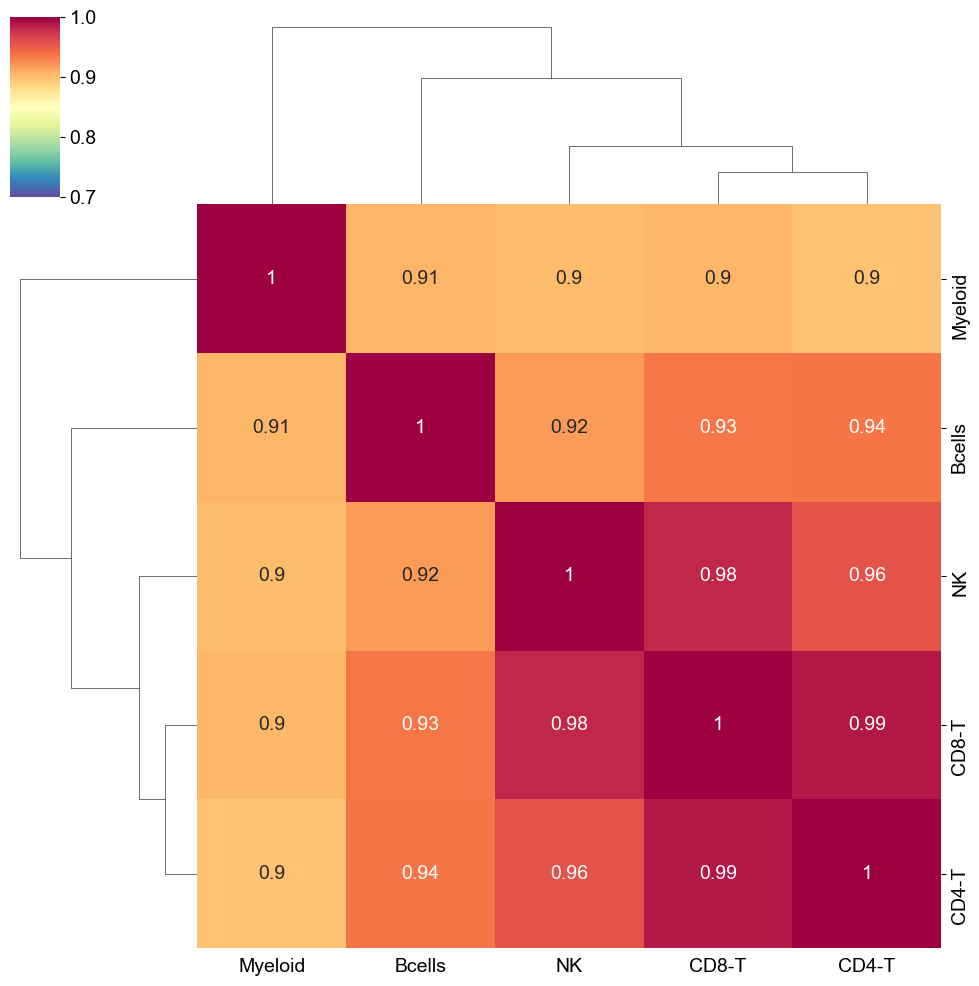

In [48]:
rna_corr = pd.DataFrame(np.corrcoef(rna_mean.X, rowvar=True), columns=rna_mean.obs_names, index=rna_mean.obs_names)
sns.clustermap(rna_corr, cmap='Spectral_r', vmin=0.7, annot=True)
plt.savefig('./fig/fig2/rna_bulk_corr.pdf')

In [22]:
adata = adata.raw.to_adata()
adata.X = sps.csr_matrix(adata.X)

In [23]:
adata_mean = sf.adata_group(adata, groupby='celltype', method='mean')
adata_mean

AnnData object with n_obs × n_vars = 5 × 41460
    obs: 'celltype'

In [25]:
adata_mean.obs_names

CategoricalIndex(['CD8-T', 'CD4-T', 'NK', 'Bcells', 'Myeloid'], categories=['Bcells', 'CD4-T', 'CD8-T', 'Myeloid', 'NK'], ordered=False, dtype='category')

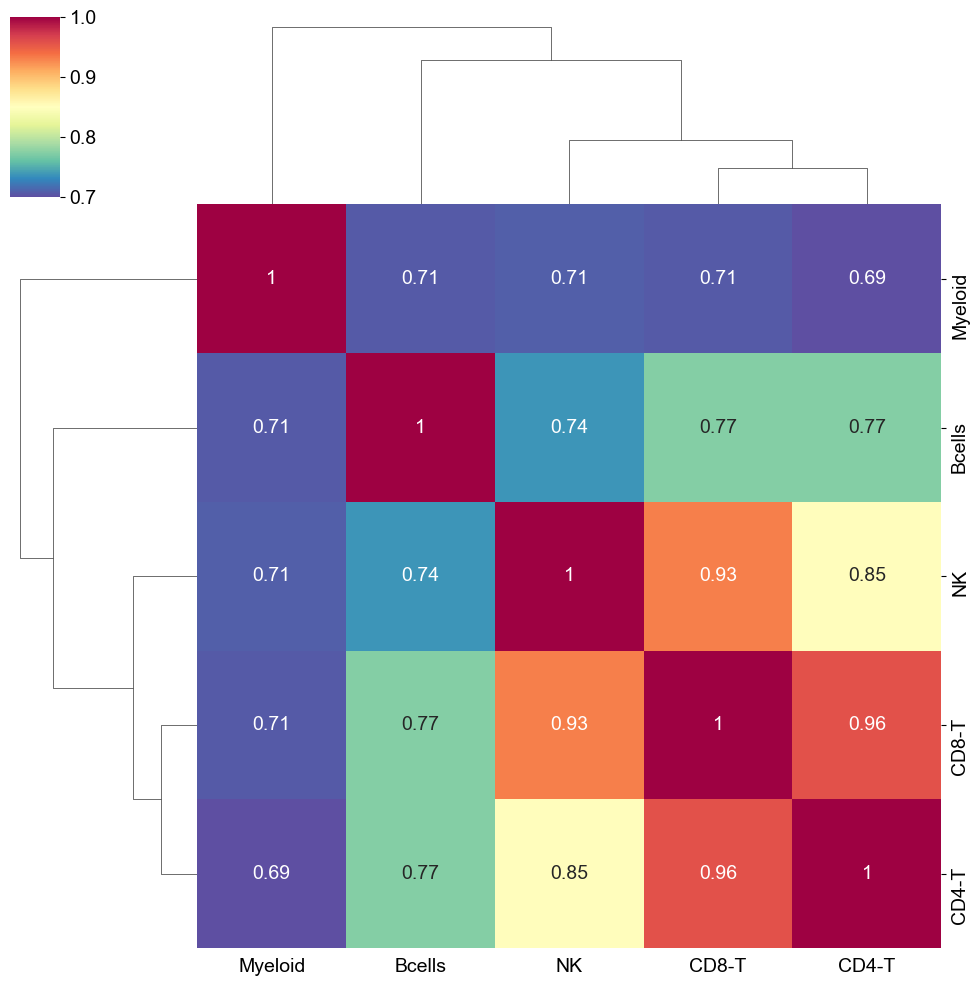

In [29]:
adata_corr = pd.DataFrame(np.corrcoef(adata_mean.X, rowvar=True), columns=adata_mean.obs_names, index=adata_mean.obs_names)
sns.clustermap(adata_corr, cmap='Spectral_r', vmin=0.7, annot=True)
plt.savefig('herv_bulk_corr.pdf')